Click [here](https://morihosseini.medium.com/dealing-with-missing-data-like-a-pro-an-adventure-in-python-c37e90ff118f) to access the associated Medium article.

# Setup

In [309]:
!pip install -q pandas scikit-learn matplotlib

# Detecting Missing Data

In [275]:
import pandas as pd

# Load your dataset
data = pd.DataFrame(
    {
        "A": [1, 2, None, 4],
        "B": [5, None, 7, None],
        "C": [None, 9, None, 11],
        "D": [12, 8, 14, 15],
    }
)

# Print the dataset
print("Original dataset:")
print(data)

Original dataset:
     A    B     C   D
0  1.0  5.0   NaN  12
1  2.0  NaN   9.0   8
2  NaN  7.0   NaN  14
3  4.0  NaN  11.0  15


In [47]:
# Check for missing values in the entire dataset
print("\nMissing values in the entire dataset:")
print(data.isnull().sum())

# Identify columns with missing values
print("\nColumns with missing values:")
print(data.columns[data.isnull().any()].tolist())


Missing values in the entire dataset:
A    1
B    2
C    2
D    0
dtype: int64

Columns with missing values:
['A', 'B', 'C']


# Strategies for Handling Missing Data

## Mean Imputation

In [48]:
# Print the original column A
print("\nOriginal column A:")
print(data["A"])

# Impute missing values with the column A's mean
data_imputed = data["A"].fillna(data["A"].mean())

# Print the imputed column A
print("\nImputed column A:")
print(data_imputed)


Original column A:
0    1.0
1    2.0
2    NaN
3    4.0
Name: A, dtype: float64

Imputed column A:
0    1.000000
1    2.000000
2    2.333333
3    4.000000
Name: A, dtype: float64


## Forward and Backward Fill

In [49]:
# Print the original column B
print("\nOriginal column B:")
print(data["B"])

# Forward-fill missing values in column B
data_imputed = data["B"].fillna(method="ffill")

# Print the forward-filled column B
print("\nForward-filled column B:")
print(data_imputed)

# Backward-fill missing values
data_imputed = data["B"].fillna(method="bfill")

# Print the backward-filled column B
print("\nBackward-filled column B:")
print(data_imputed)


Original column B:
0    5.0
1    NaN
2    7.0
3    NaN
Name: B, dtype: float64

Forward-filled column B:
0    5.0
1    5.0
2    7.0
3    7.0
Name: B, dtype: float64

Backward-filled column B:
0    5.0
1    7.0
2    7.0
3    NaN
Name: B, dtype: float64


## Predictive Imputation

In [50]:
from sklearn.ensemble import RandomForestRegressor


def impute_with_random_forest(df, target_column):
    # Split data into two sets: with and without missing values in the
    # target column
    known = df[df[target_column].notnull()]
    unknown = df[df[target_column].isnull()]

    # Create the Random Forest model
    model = RandomForestRegressor()

    # Train the model on known data to predict missing values
    X = known.drop(columns=[target_column])
    y = known[target_column]
    model.fit(X, y)

    # Predict missing values
    predicted_values = model.predict(unknown.drop(columns=[target_column]))

    # Assign predicted values to missing entries
    df.loc[df[target_column].isnull(), target_column] = predicted_values


# Impute missing values of all columns except C
data_imputed = data.copy()
data_imputed[["A", "B"]] = data_imputed[["A", "B"]].fillna(
    data_imputed[["A", "B"]].mean()
)

# Print the dataset before imputing column C
print("Before imputing column C:")
print(data_imputed)

# Impute the column C
impute_with_random_forest(data_imputed, "C")

# Print the dataset after imputing column C
print("\nAfter imputing column C:")
print(data_imputed)

Before imputing column C:
          A    B     C   D
0  1.000000  5.0   NaN  12
1  2.000000  6.0   9.0   8
2  2.333333  7.0   NaN  14
3  4.000000  6.0  11.0  15

After imputing column C:
          A    B      C   D
0  1.000000  5.0   9.92  12
1  2.000000  6.0   9.00   8
2  2.333333  7.0   9.92  14
3  4.000000  6.0  11.00  15


## K-Nearest Neighbors (KNN)

In [131]:
from sklearn.impute import KNNImputer

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=2)

# Perform imputation on all columns with missing values
array_imputed = knn_imputer.fit_transform(data)
data_imputed = pd.DataFrame(array_imputed, columns=data.columns)

# Print the original dataset
print("Before imputation:")
print(data)

# Print the imputed dataset
print("\nAfter imputation:")
print(data_imputed)

Before imputation:
     A    B     C   D
0  1.0  5.0   NaN  12
1  2.0  NaN   9.0   8
2  NaN  7.0   NaN  14
3  4.0  NaN  11.0  15

After imputation:
     A    B     C     D
0  1.0  5.0  10.0  12.0
1  2.0  6.0   9.0   8.0
2  2.5  7.0  10.0  14.0
3  4.0  6.0  11.0  15.0


# Verifying Imputations

## Check for Remaining Missing Values

In [228]:
# Verify if any missing values remain
print(data_imputed.isnull().sum())

A    0
B    0
C    0
D    0
dtype: int64


## Compare Distributions

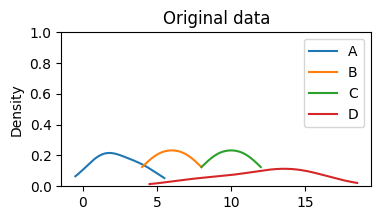

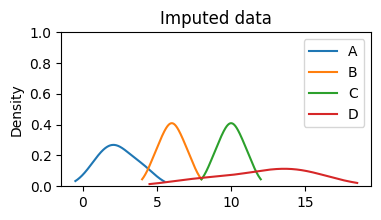

In [241]:
# Visualize the distribution of the original and imputed data
data.plot(kind="density", title="Original data", ylim=(0, 1), figsize=(4, 2))

data_imputed.plot(
    kind="density", title="Imputed data", ylim=(0, 1), figsize=(4, 2)
);

# Domain-Specific Imputation

## Time-Series Imputation

In [290]:
# Print the dataset before interpolation
print("Before interpolation:")
print(data)

# Print the dataset after interpolation
print("\nAfter interpolation:")
print(data.interpolate())

Before interpolation:
     A    B     C   D
0  1.0  5.0   NaN  12
1  2.0  NaN   9.0   8
2  NaN  7.0   NaN  14
3  4.0  NaN  11.0  15

After interpolation:
     A    B     C   D
0  1.0  5.0   NaN  12
1  2.0  6.0   9.0   8
2  3.0  7.0  10.0  14
3  4.0  7.0  11.0  15


## Categorical Data Imputation

In [307]:
# Dataset
data_cat = pd.Series(["a", "b", None, "d"] * 2 + ["b"])

# Print the dataset before imputation
print("Before imputation:")
print(data_cat)

# Find the most frequent category
most_frequent = data_cat.mode()[0]
print("\nMost frequent category:", most_frequent)

# Replace missing values with the most frequent category
data_cat.fillna(most_frequent, inplace=True)

# Print the dataset after imputation
print("\nAfter imputation:")
print(data_cat)

Before imputation:
0       a
1       b
2    None
3       d
4       a
5       b
6    None
7       d
8       b
dtype: object

Most frequent category: b

After imputation:
0    a
1    b
2    b
3    d
4    a
5    b
6    b
7    d
8    b
dtype: object
